In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/premier-league/results.csv
/kaggle/input/premier-league/stats.csv


<h1>Analyse des données à partir d'un dataset des résultats et statistiques en première division de football anglais (Premier League) de la saison 2006-2007 à la saison 2017-2018</h1>

In [2]:
stats_data = pd.read_csv("/kaggle/input/premier-league/stats.csv")
stats_data.columns

Index(['team', 'wins', 'losses', 'goals', 'total_yel_card', 'total_red_card',
       'total_scoring_att', 'ontarget_scoring_att', 'hit_woodwork',
       'att_hd_goal', 'att_pen_goal', 'att_freekick_goal', 'att_ibox_goal',
       'att_obox_goal', 'goal_fastbreak', 'total_offside', 'clean_sheet',
       'goals_conceded', 'saves', 'outfielder_block', 'interception',
       'total_tackle', 'last_man_tackle', 'total_clearance', 'head_clearance',
       'own_goals', 'penalty_conceded', 'pen_goals_conceded', 'total_pass',
       'total_through_ball', 'total_long_balls', 'backward_pass',
       'total_cross', 'corner_taken', 'touches', 'big_chance_missed',
       'clearance_off_line', 'dispossessed', 'penalty_save',
       'total_high_claim', 'punches', 'season'],
      dtype='object')

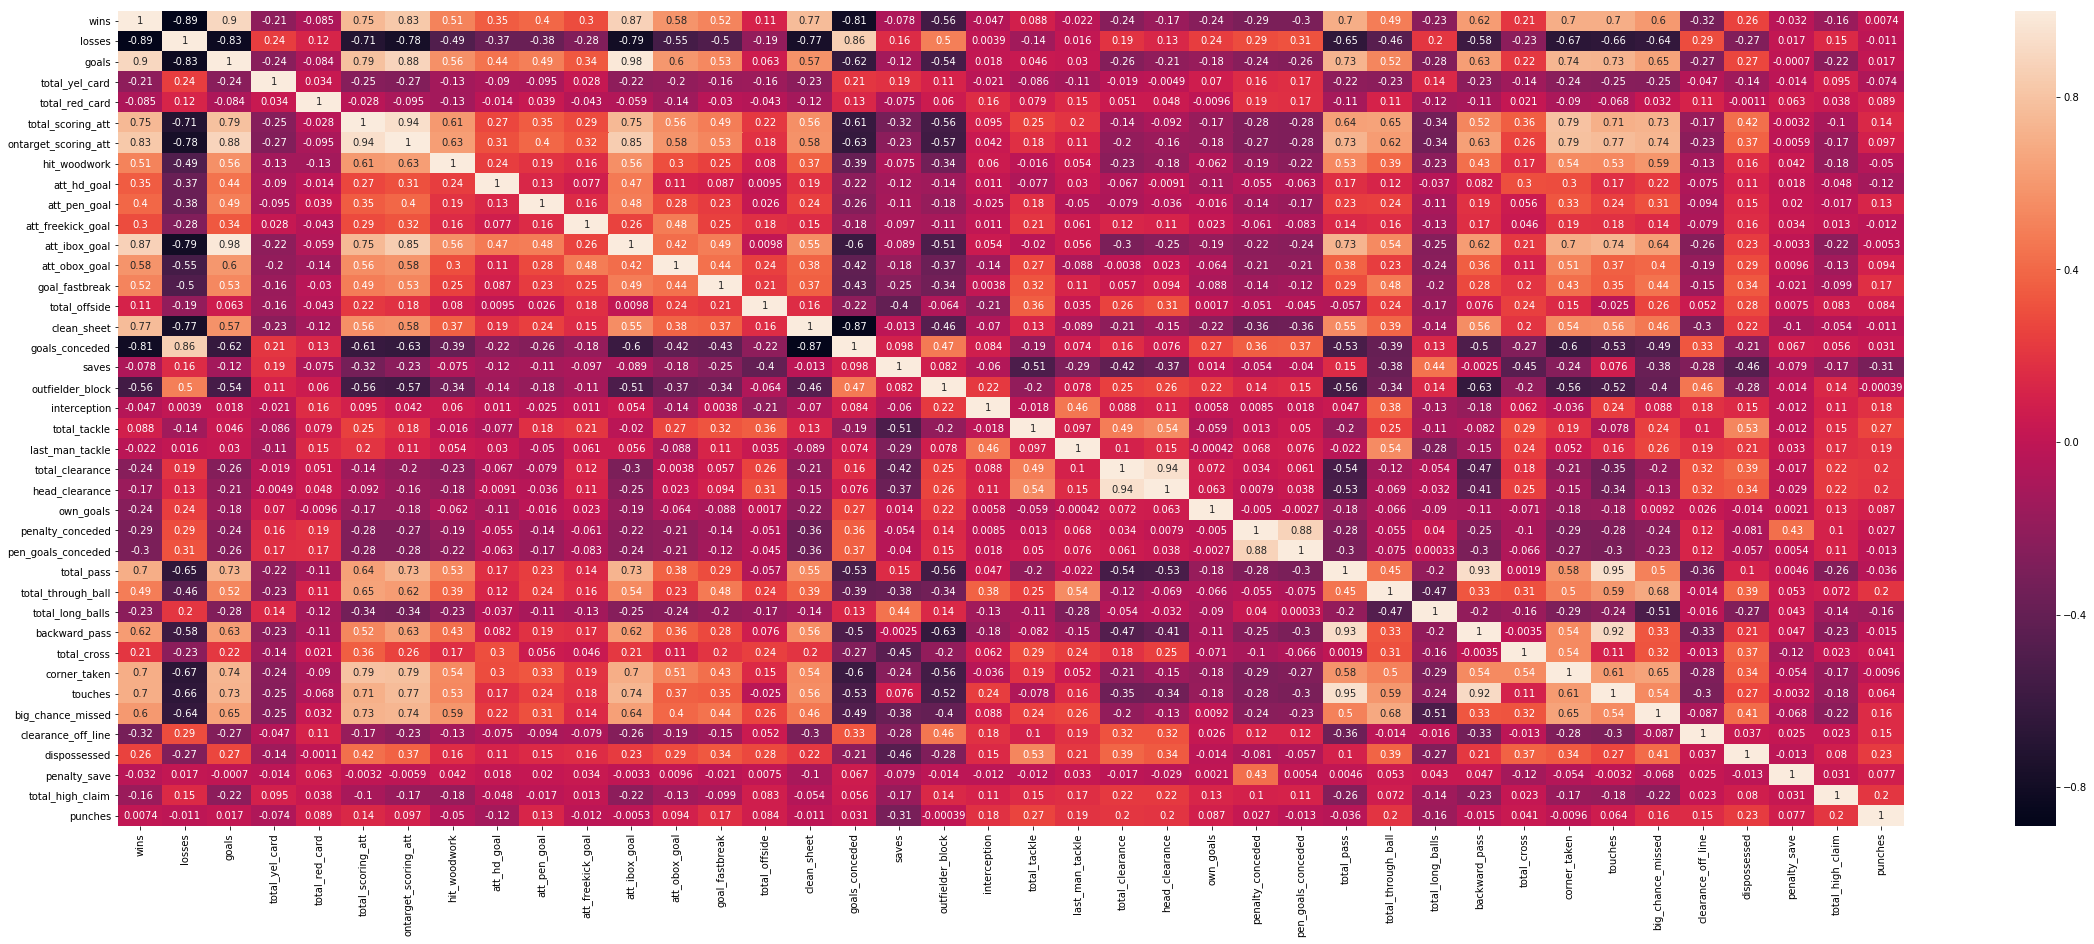

In [3]:
plt.subplots(figsize=(40,15))
heatmap = sns.heatmap(stats_data.corr(), annot=True)

On peut voir par exemple que les victoires sont grandement liées au nombre de buts, aux nombres de frappes cadrées, ou encore aux clean sheets (matchs sans encaisser de but).

Le nombre de passes est très dépendant du nombre de touché de balle

La plupart des dégagement sont fait de la tête

etc..

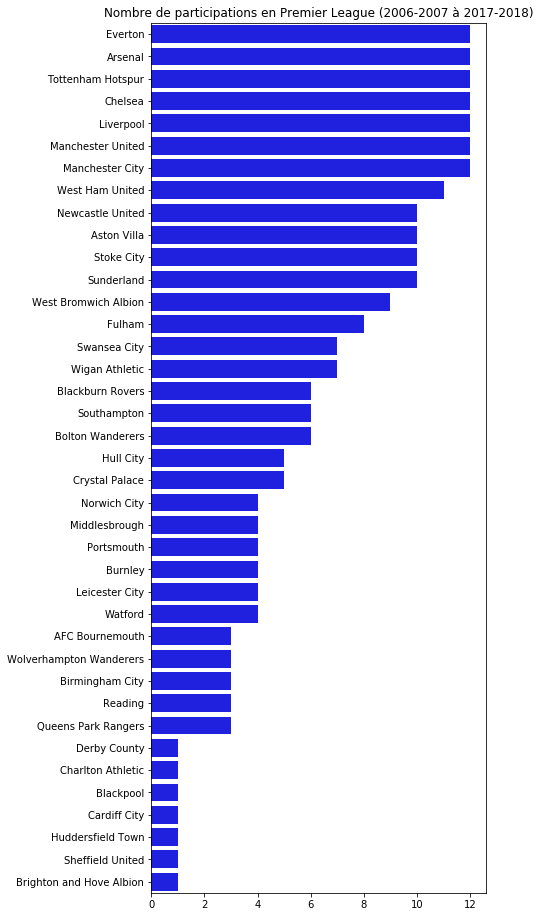

In [4]:
plt.figure(figsize=(6,16))
equipes = stats_data['team'].value_counts()
plt.title('Nombre de participations en Premier League (2006-2007 à 2017-2018)')
sns.barplot(x= equipes.values, y=equipes.keys(), color="Blue", orient="h")

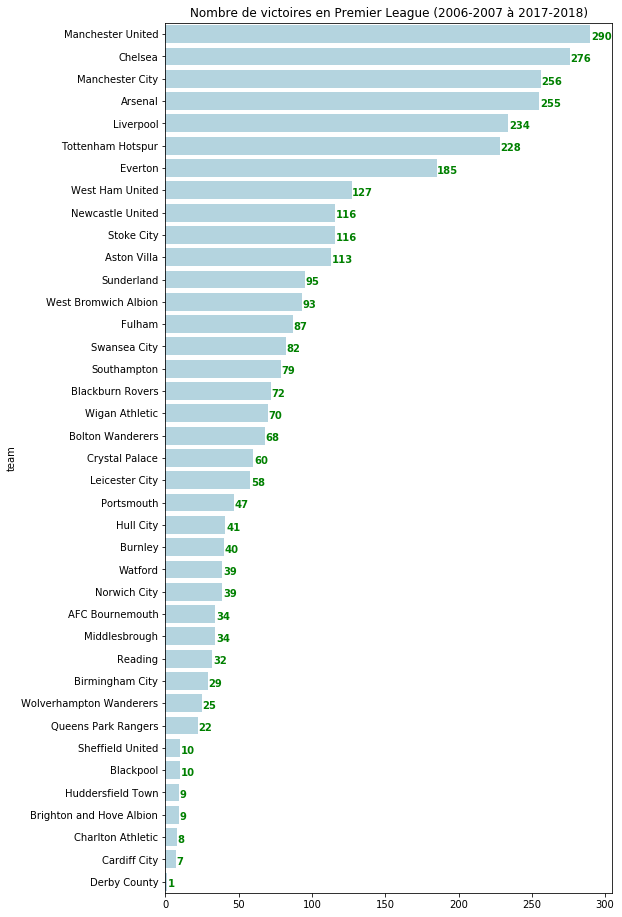

In [5]:
plt.figure(figsize=(8,16))  
wins_by_team = stats_data[['team','wins']].groupby('team').sum().sort_values(['wins'], ascending=[0])
wins_by_team = pd.Series(data=wins_by_team['wins'], index=wins_by_team.index)

for i, v in enumerate(wins_by_team):
    plt.text(v + 0.5, i + .25, "{0:.0f}".format(v), color='green', fontweight='bold')
         
plt.title('Nombre de victoires en Premier League (2006-2007 à 2017-2018)')
sns.barplot(x= wins_by_team.values, y=wins_by_team.keys(), color="LightBlue", orient="h")

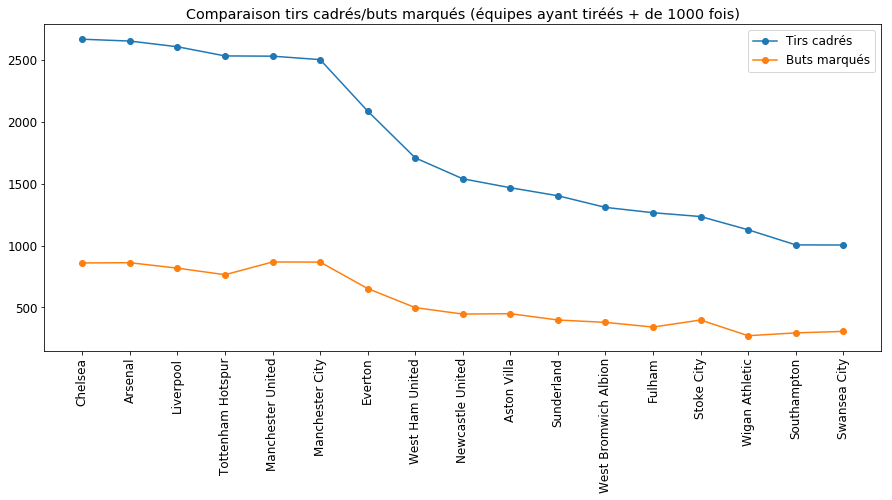

In [6]:
on_target_and_goals = stats_data[['team','ontarget_scoring_att','goals', ]].groupby('team')
on_target_and_goals = on_target_and_goals.sum()
on_target_and_goals = on_target_and_goals.where(on_target_and_goals['ontarget_scoring_att'] >= 1000)
on_target_and_goals = on_target_and_goals.dropna()
on_target_and_goals['ratio'] = on_target_and_goals['ontarget_scoring_att'] / on_target_and_goals['goals']
on_target_and_goals = on_target_and_goals.sort_values(['ontarget_scoring_att'], ascending=[0])

plt.figure(figsize=(15,6))
plt.rcParams.update({'font.size': 12})
plt.plot(on_target_and_goals['ontarget_scoring_att'], label="Tirs cadrés", marker='o')
plt.plot(on_target_and_goals['goals'], label="Buts marqués", marker='o')

plt.xticks( rotation='vertical')
plt.legend()
plt.title('Comparaison tirs cadrés/buts marqués (équipes ayant tiréés + de 1000 fois)')

plt.show()


Text(0.5, 1.0, 'Victoires et défaites par saison (Chelsea)')

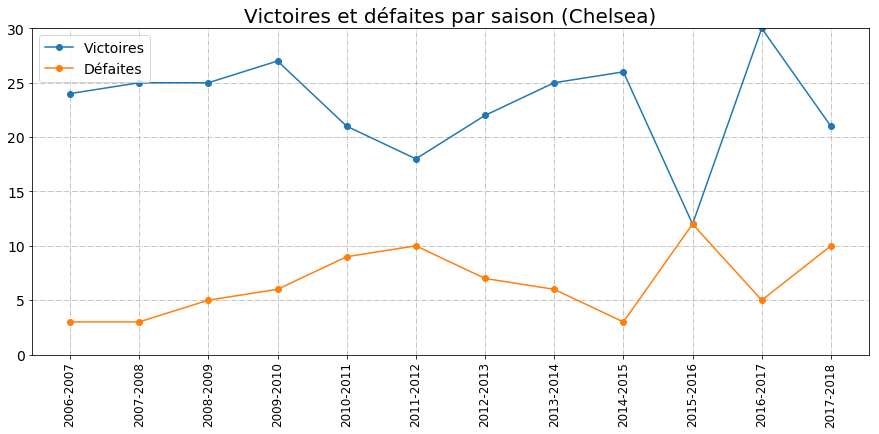

In [7]:
data_chelsea = stats_data[stats_data.team=='Chelsea']

wins = ['wins','season'] 
losses = ['losses','season']

data_chelsea_wins = data_chelsea[wins]
data_chelsea_losses = data_chelsea[losses]

plt.figure(figsize=(15,6))
plt.plot(data_chelsea_wins.season, data_chelsea_wins.wins, label = 'Victoires', marker='o')
plt.plot(data_chelsea_losses.season, data_chelsea_losses.losses, label = 'Défaites', marker='o')


plt.ylim(0,30)
plt.grid(which='major', axis='both', linestyle='-.', linewidth=0.75) 
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xticks( rotation='vertical')
plt.title('Victoires et défaites par saison (Chelsea)', fontsize = 20)

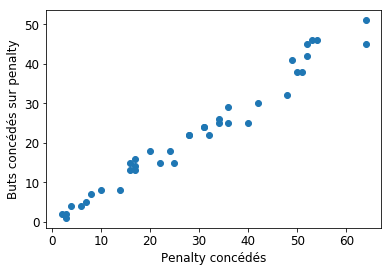

In [8]:
#pd.set_option('display.max_rows', stats_data.shape[0]+1)
penalty_rate = stats_data[['team','penalty_conceded','pen_goals_conceded', ]].groupby('team')

penalty_rate = penalty_rate.sum()

plt.scatter(penalty_rate['penalty_conceded'], penalty_rate['pen_goals_conceded'])
plt.xlabel("Penalty concédés")
plt.ylabel("Buts concédés sur penalty")
plt.show()

In [9]:
results_data = pd.read_csv("/kaggle/input/premier-league/results.csv")
results_data.columns

Index(['home_team', 'away_team', 'home_goals', 'away_goals', 'result',
       'season'],
      dtype='object')

Text(0.5, 0, 'à domicile?')

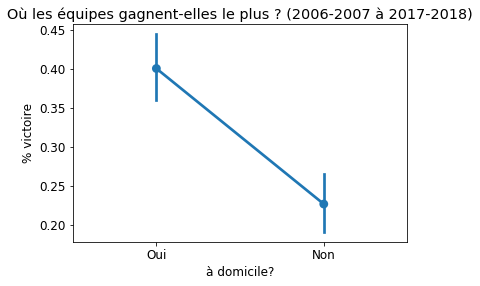

In [10]:
wins_home_filter = results_data['result'] == "H"
wins_away_filter = results_data['result'] == "A"
draw_loss_home_filter = (results_data['result'] == "A") | (results_data['result'] == "D")
draw_loss_away_filter = (results_data['result'] == "H") | (results_data['result'] == "D")

wins_at_home = results_data[wins_home_filter].groupby('home_team').count().sort_values(['result'], ascending=[0])['result']
draws_and_losses_at_home = results_data[draw_loss_home_filter].groupby('home_team').count().sort_values(['result'], ascending=[0])['result']
d_home = {'wins': wins_at_home, 'draws_and_losses': draws_and_losses_at_home}

wins_away = results_data[wins_away_filter].groupby('away_team').count().sort_values(['result'], ascending=[0])['result']
draws_and_losses_away = results_data[draw_loss_away_filter].groupby('away_team').count().sort_values(['result'], ascending=[0])['result']
d_away = {'wins': wins_away, 'draws_and_losses': draws_and_losses_away}

wdl_home = pd.DataFrame(data=d_home).sort_values(['wins', 'draws_and_losses'], ascending=[0,0])
wdl_away =  pd.DataFrame(data=d_away).sort_values(['wins', 'draws_and_losses'], ascending=[0,0])

wdl_away = wdl_away.fillna(0)
format = lambda x: '%.0f' % x
wdl_away = wdl_away.applymap(format)



wdl_home['win%'] = wdl_home['wins'] / (wdl_home['wins'] + wdl_home['draws_and_losses'])
wdl_home['is_home'] = "Oui"
wdl_home = wdl_home.reset_index()


wdl_away['win%'] = wdl_away['wins'].astype(int) / (wdl_away['wins'].astype(int) + wdl_away['draws_and_losses'].astype(int))
wdl_away['is_home'] = "Non"
wdl_away = wdl_away.reset_index()

win_perct_final_stats = pd.concat([wdl_home, wdl_away])
win_perct_final_stats = win_perct_final_stats.rename(columns={'index':'team'})


plt.title("Où les équipes gagnent-elles le plus ? (2006-2007 à 2017-2018)")
sns.pointplot(x="is_home", y="win%", data=win_perct_final_stats)
plt.ylabel('% victoire')
plt.xlabel('à domicile?')

In [11]:
#plt.figure(figsize=(20,15))
#plt.title("Où les équipes gagnent-elles le plus ? (2006-2007 à 2017-2018, par équipe)")
#sns.pointplot(x="is_home", y="win%", hue="index", data=win_perct_final_stats)
#plt.legend(loc='upper right')
#plt.ylabel('% victoire')
#plt.xlabel('à domicile?')

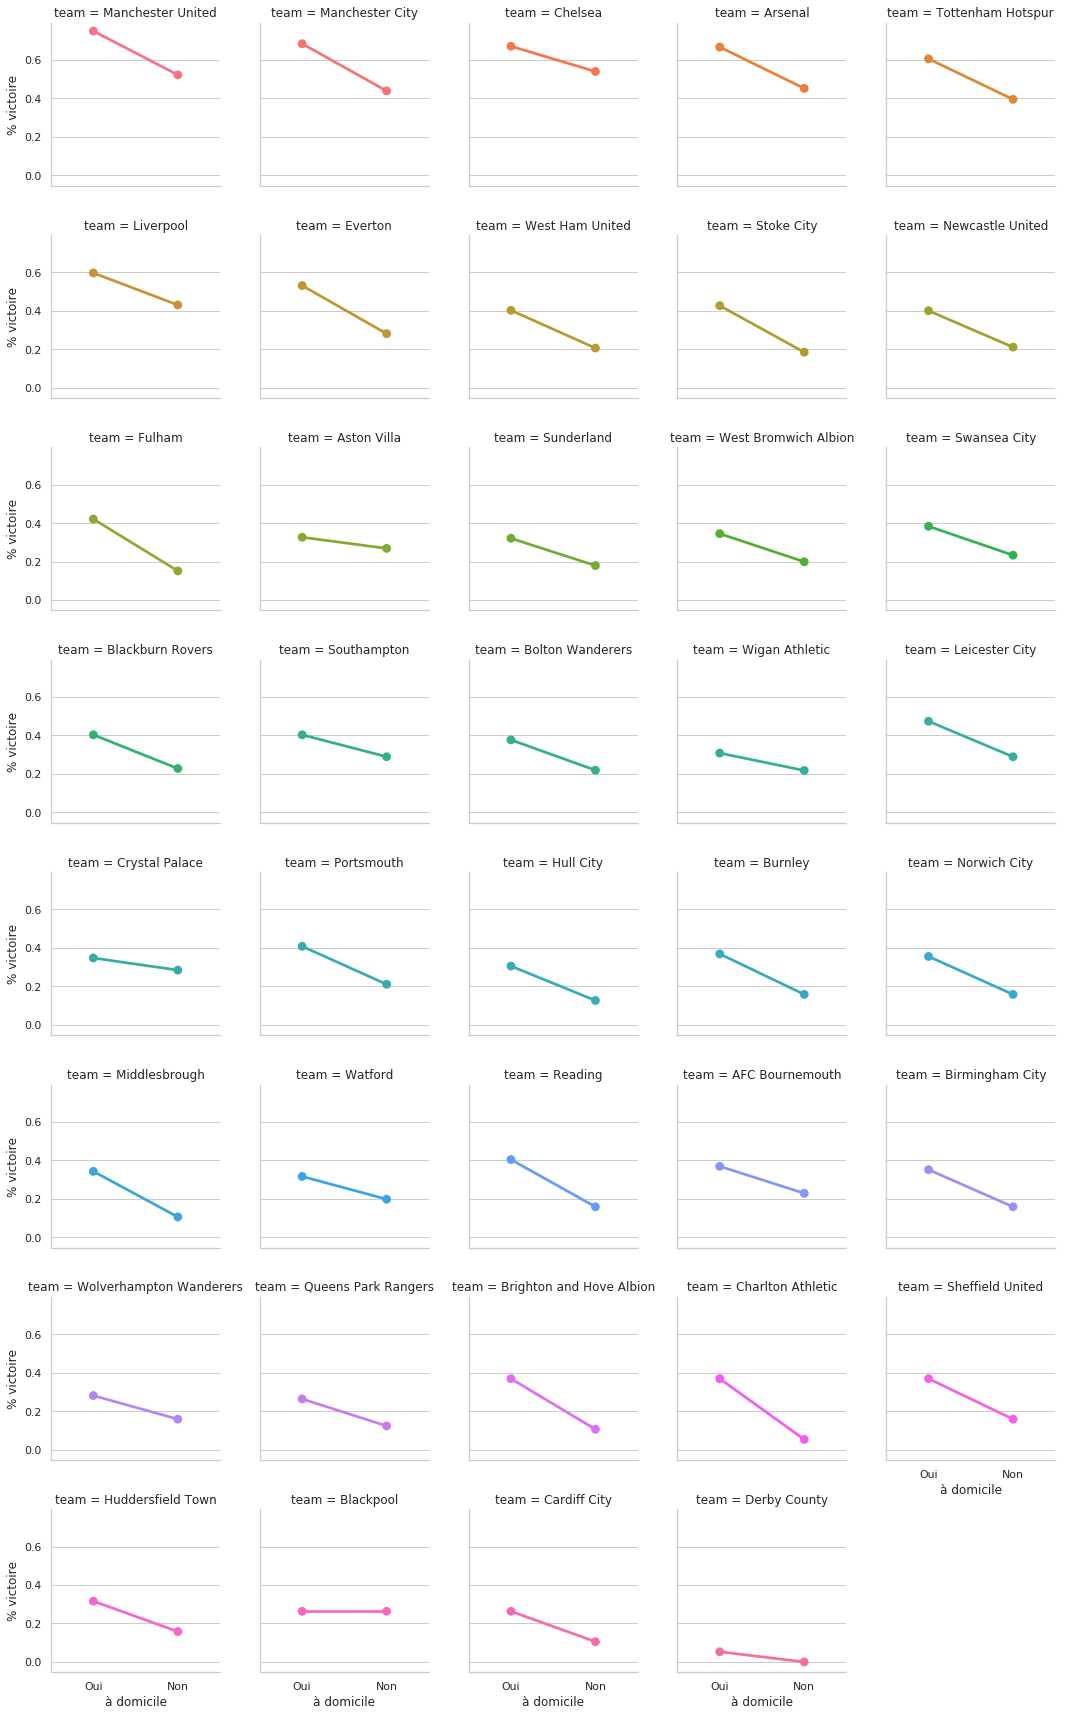

In [72]:

g = sns.FacetGrid(win_perct_final_stats, 
                  col='team', hue='team', col_wrap=5)
g.map(sns.pointplot, 'is_home', 'win%',  order=["Oui", "Non"])
g.set_axis_labels('à domicile', '% victoire')

[Text(0, 0.5, 'Matchs'), Text(0.5, 0, 'Buts /match')]

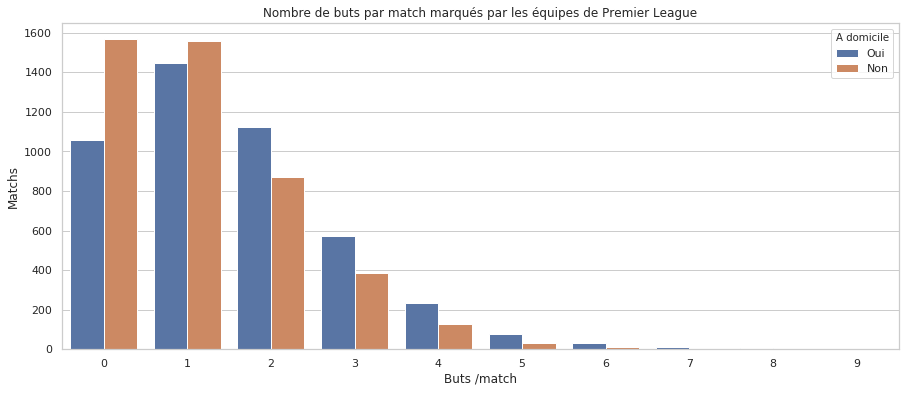

In [13]:
import matplotlib.patches as mpatches
home_goals_counter = results_data.groupby('home_goals')["home_team"].count().reset_index(name="count")
away_goals_counter = results_data.groupby('away_goals')["home_team"].count().reset_index(name="count")

home_goals_counter = home_goals_counter.astype('int64')
away_goals_counter = away_goals_counter.astype('int64')
away_goals_counter = away_goals_counter.append([{'away_goals': 8, "count": 0},{'away_goals': 9, "count": 0}])

home_goals_counter = home_goals_counter.rename(columns={"home_goals": "goals"})
home_goals_counter['A domicile'] = "Oui"
away_goals_counter = away_goals_counter.rename(columns={"away_goals": "goals"})
away_goals_counter['A domicile'] = "Non"

final_goals_stats =  pd.concat([home_goals_counter, away_goals_counter])


plt.figure(figsize=(15,6))
sns.set(style="whitegrid")
ax = sns.barplot(x=final_goals_stats['goals'], y=final_goals_stats['count'], hue=final_goals_stats["A domicile"], data=home_goals_counter)
ax.set_title("Nombre de buts par match marqués par les équipes de Premier League")
ax.set(xlabel='Buts /match', ylabel='Matchs')

par exemple pour la première barre, il y'a eu (à vu d'oeil) environ 1030 matchs où l'équipe à domicile à marqué 0 but